## Simple experiment

In [1]:
import subprocess
import os
import sys
import pathlib
import shutil

In [2]:
project = r"D:\courses\DT\assignment\opendc-demos-main"
exp     = rf"{project}\experiments\simple_experiment.json"
cp      = rf"{project}\OpenDCExperimentRunner\lib\*"

In [10]:
env_root  = pathlib.Path(sys.executable).resolve().parent
# java_home = r"C:\Program Files\Common Files\Oracle\Java\javapath\"
java_exe  =  r"C:\Program Files\Common Files\Oracle\Java\javapath\java.exe"

In [11]:
java_home

WindowsPath('D:/genai_projects/venv/Library')

In [12]:
os.environ["JAVA_HOME"] = str(java_home)
os.environ["PATH"] = str(java_home / "bin") + os.pathsep + os.environ["PATH"]

In [13]:
assert pathlib.Path(exp).exists(), f"Missing file: {exp}"
assert pathlib.Path(cp[:-1]).exists(), f"Missing folder: {cp[:-2]}"

In [14]:
cmd = [str(java_exe), "-cp", cp, "org.opendc.experiments.base.runner.ExperimentCli",
       "--experiment-path", exp]
print("Running:", cmd)
res = subprocess.run(cmd, cwd=project, text=True, capture_output=True)
print("Return code:", res.returncode)
print("--- STDOUT ---\n", res.stdout)
print("--- STDERR ---\n", res.stderr)

Running: ['C:\\Program Files\\Common Files\\Oracle\\Java\\javapath\\java.exe', '-cp', 'D:\\courses\\DT\\assignment\\opendc-demos-main\\OpenDCExperimentRunner\\lib\\*', 'org.opendc.experiments.base.runner.ExperimentCli', '--experiment-path', 'D:\\courses\\DT\\assignment\\opendc-demos-main\\experiments\\simple_experiment.json']
Return code: 0
--- STDOUT ---
 

 Running scenario: 0 
 Starting seed: 0 
16:30:51.095 [WARN ] UnitSerializer - deserialization of number with no unit of measure, assuming it is in MHz...
16:30:51.115 [WARN ] UnitSerializer - deserialization of number with no unit of measure for unit 'DataSize', assuming it is in MiB. Keep in mind that you can also specify the value as '1.404576E11 MiB'
16:30:53.575 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 1680 hours:
						Tasks Total: 50
						Tasks Active: 1
						Tasks Pending: 39
						Tasks Completed: 10
						Tasks Terminated: 0

16:30:54.188 [WARN ] org.opendc.compute.simulat

## Analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [15]:
df_tasks = pd.read_parquet("workload_traces/bitbrains-small/tasks.parquet")
df_fragments = pd.read_parquet("workload_traces/bitbrains-small/fragments.parquet")

df_tasks.head()

id  submission_time    duration  cpu_count  cpu_capacity  mem_capacity
0  1019    1376314546000  2592252000          1   2926.000135        181352
1  1023    1376314546000  2592252000          1   2925.999560        260096
2  1026    1376314546000  2592252000          1   2925.999717        249972
3  1052    1377787092000   577855000          1   2926.000107        131245
4  1073    1377083232000  1823566000          1   2599.999649        179306

In [16]:
df_fragments.head()

id  duration  cpu_usage
0  1019    300000   0.000000
1  1019    300000  11.703998
2  1019    600000   0.000000
3  1019    300000  11.703998
4  1019    900000   0.000000

In [17]:
df_host_small = pd.read_parquet("output/simple/raw-output/0/seed=0/host.parquet")
df_powerSource_small = pd.read_parquet("output/simple/raw-output/0/seed=0/powerSource.parquet")
df_task_small = pd.read_parquet("output/simple/raw-output/0/seed=0/task.parquet")
df_service_small = pd.read_parquet("output/simple/raw-output/0/seed=0/service.parquet")

df_host_big = pd.read_parquet("output/simple/raw-output/1/seed=0/host.parquet")
df_powerSource_big = pd.read_parquet("output/simple/raw-output/1/seed=0/powerSource.parquet")
df_task_big = pd.read_parquet("output/simple/raw-output/1/seed=0/task.parquet")
df_service_big = pd.read_parquet("output/simple/raw-output/1/seed=0/service.parquet")

print(f"The small dataset has {len(df_service_small)} service samples.")
print(f"The big dataset has {len(df_service_big)} service samples.")

The small dataset has 12026 service samples.
The big dataset has 1440 service samples.


In [18]:
print(f"The host file contains the following columns:\n {np.array(df_host_small.columns)}\n")
print(f"The host file consist of {len(df_host_small)} samples\n")
df_host_small.head()

The host file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'host_name' 'cluster_name' 'core_count'
 'mem_capacity' 'tasks_terminated' 'tasks_running' 'tasks_error'
 'tasks_invalid' 'cpu_capacity' 'cpu_usage' 'cpu_demand' 'cpu_utilization'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'power_draw' 'energy_usage' 'embodied_carbon' 'uptime' 'downtime'
 'boot_time']

The host file consist of 12026 samples



timestamp  timestamp_absolute host_name cluster_name  core_count  \
0    3600000       1376318146000       H01          C01          12   
1    7200000       1376321746000       H01          C01          12   
2   10800000       1376325346000       H01          C01          12   
3   14400000       1376328946000       H01          C01          12   
4   18000000       1376332546000       H01          C01          12   

   mem_capacity  tasks_terminated  tasks_running  tasks_error  tasks_invalid  \
0  140457600000                 0              8            0              0   
1  140457600000                 0              8            0              0   
2  140457600000                 0              8            0              0   
3  140457600000                 0              8            0              0   
4  140457600000                 0              8            0              0   

   ...  cpu_time_active  cpu_time_idle  cpu_time_steal  cpu_time_lost  \
0  ...            20173        3579827               0              0   
1  ...            20804        3579196               0              0   
2  ...            20156        3579844               0              0   
3  ...            20457        3579543               0              0   
4  ...            20021        3579979               0              0   

   power_draw  energy_usage  embodied_carbon   uptime  downtime      boot_time  
0  201.169052   724034.5000        22.831051  3600000         0  1376314546000  
1  201.325562   724160.9375        22.831051  3600000         0  1376314546000  
2  201.158096   724031.1875        22.831051  3600000         0  1376314546000  
3  201.375916   724091.3125        22.831051  3600000         0  1376314546000  
4  201.159195   724004.3125        22.831051  3600000         0  1376314546000  

[5 rows x 24 columns]

In [19]:
print(f"The task file contains the following columns:\n {np.array(df_task_small.columns)}\n")
print(f"The task file consist of {len(df_task_small)} samples\n")
df_task_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'task_id' 'task_name' 'host_name'
 'mem_capacity' 'cpu_count' 'cpu_limit' 'cpu_usage' 'cpu_demand'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'gpu_count' 'gpu_limit' 'gpu_usage' 'gpu_demand' 'gpu_time_active'
 'gpu_time_idle' 'gpu_time_steal' 'gpu_time_lost' 'uptime' 'downtime'
 'num_failures' 'num_pauses' 'schedule_time' 'submission_time'
 'finish_time' 'task_state']

The task file consist of 343430 samples



timestamp  timestamp_absolute  task_id task_name host_name  mem_capacity  \
0    3600000       1376318146000     1152                 H01           196   
1    3600000       1376318146000      832                              8389   
2    3600000       1376318146000      449                              8393   
3    3600000       1376318146000     1026                 H01           250   
4    3600000       1376318146000      578                              2092   

   cpu_count  cpu_limit  cpu_usage  cpu_demand  ...  gpu_time_steal  \
0          1    39600.0   0.000000    0.000000  ...               0   
1          2        0.0   0.000000    0.000000  ...               0   
2          4        0.0   0.000000    0.000000  ...               0   
3          1    39600.0  23.407997   23.407997  ...               0   
4          1        0.0   0.000000    0.000000  ...               0   

   gpu_time_lost   uptime  downtime  num_failures  num_pauses  schedule_time  \
0              0  3600000         0             0           0            0.0   
1              0        0         0             0           0            NaN   
2              0        0         0             0           0            NaN   
3              0  3600000         0             0           0            0.0   
4              0        0         0             0           0            NaN   

   submission_time  finish_time    task_state  
0                0          NaN       RUNNING  
1                0          NaN  PROVISIONING  
2                0          NaN  PROVISIONING  
3                0          NaN       RUNNING  
4                0          NaN  PROVISIONING  

[5 rows x 30 columns]

In [20]:
print(f"The task file contains the following columns:\n {np.array(df_powerSource_small.columns)}\n")
print(f"The power file consist of {len(df_powerSource_small)} samples\n")
df_powerSource_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'source_name' 'cluster_name'
 'power_draw' 'energy_usage' 'carbon_intensity' 'carbon_emission']

The power file consist of 12026 samples



timestamp  timestamp_absolute  source_name cluster_name  power_draw  \
0    3600000       1376318146000  PowerSource          C01  201.169052   
1    7200000       1376321746000  PowerSource          C01  201.325562   
2   10800000       1376325346000  PowerSource          C01  201.158096   
3   14400000       1376328946000  PowerSource          C01  201.375916   
4   18000000       1376332546000  PowerSource          C01  201.159195   

   energy_usage  carbon_intensity  carbon_emission  
0   724034.5000               0.0              0.0  
1   724160.9375               0.0              0.0  
2   724031.1875               0.0              0.0  
3   724091.3125               0.0              0.0  
4   724004.3125               0.0              0.0

In [21]:
print(f"The service file contains the following columns:\n {np.array(df_service_small.columns)}\n")
print(f"The service file consist of {len(df_service_small)} samples\n")
df_service_small.head()

The service file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'hosts_up' 'hosts_down' 'tasks_total'
 'tasks_pending' 'tasks_active' 'tasks_completed' 'tasks_terminated']

The service file consist of 12026 samples



timestamp  timestamp_absolute  hosts_up  hosts_down  tasks_total  \
0    3600000       1376318146000         1           0           44   
1    7200000       1376321746000         1           0           44   
2   10800000       1376325346000         1           0           44   
3   14400000       1376328946000         1           0           44   
4   18000000       1376332546000         1           0           44   

   tasks_pending  tasks_active  tasks_completed  tasks_terminated  
0             36             8                0                 0  
1             36             8                0                 0  
2             36             8                0                 0  
3             36             8                0                 0  
4             36             8                0                 0

In [22]:
# Getting the end time of the simulation, and thus the runtime
runtime_small = df_service_small["timestamp"].max()
runtime_big = df_service_big["timestamp"].max()

# Converting the runtime from ms to timedelta
runtime_small_td = pd.to_timedelta(runtime_small, unit='ms')
runtime_big_td = pd.to_timedelta(runtime_big, unit='ms')

# Printing the results 
print(f"The runtime of the small datacenter is {runtime_small_td} hours")
print(f"The runtime of the big datacenter is {runtime_big_td} hours")

The runtime of the small datacenter is 501 days 01:53:08 hours
The runtime of the big datacenter is 59 days 23:44:48 hours


In [23]:
# Getting the end time of the simulation, and thus the runtime
runtime_small = df_host_small["cpu_utilization"].mean()
runtime_big = df_host_big["cpu_utilization"].mean()

# Convert utlization to percentage
runtime_small = runtime_small * 100
runtime_big = runtime_big * 100

# Printing the results
print(f"The average CPU utilization of the small datacenter is {runtime_small:.2f} %")
print(f"The average CPU utilization of the big datacenter is {runtime_big:.2f} %")

The average CPU utilization of the small datacenter is 11.84 %
The average CPU utilization of the big datacenter is 10.96 %


In [24]:
# Get the total energy usage during the simulation
energy_small = df_powerSource_small["energy_usage"].sum()
energy_big = df_powerSource_big["energy_usage"].sum()

# Convert energy to kWh
energy_small = energy_small / 3_600_000
energy_big = energy_big / 3_600_000

# Printing the results
print(f"The total energy usage of the small datacenter is {energy_small:.2f} kWh")
print(f"The total energy usage of the big datacenter is {energy_big:.2f} kWh")

The total energy usage of the small datacenter is 2690.83 kWh
The total energy usage of the big datacenter is 2876.43 kWh


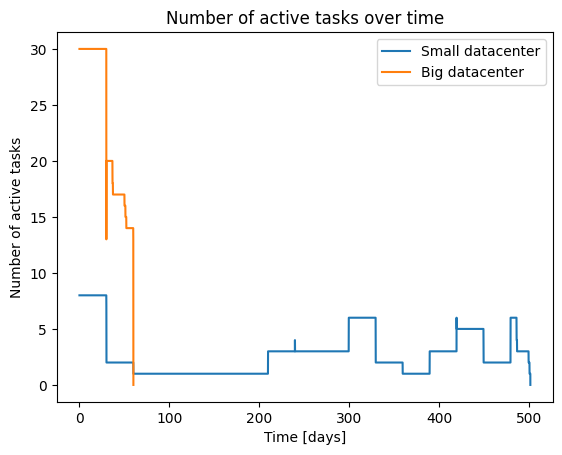

In [25]:
plt.plot(df_service_small["timestamp"]/3_600_000 / 24, df_service_small["tasks_active"], label="Small datacenter")
plt.plot(df_service_big["timestamp"]/3_600_000 / 24, df_service_big["tasks_active"], label="Big datacenter")
plt.xlabel("Time [days]")
plt.ylabel("Number of active tasks")
plt.title("Number of active tasks over time")
plt.legend()

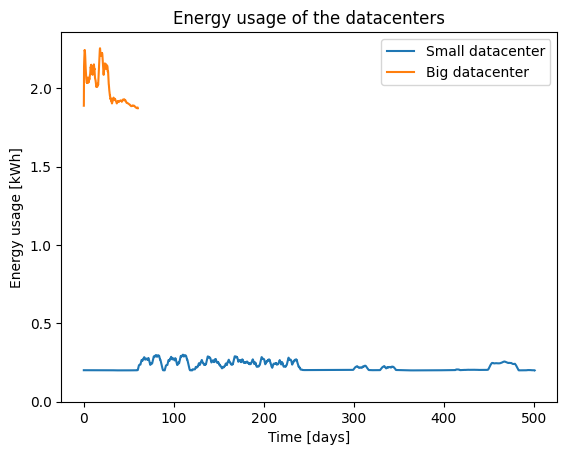

In [26]:
# Sum the energy usage of each power source at each timestamp
energy_usage_big = df_powerSource_big.groupby("timestamp")["energy_usage"].sum()

# Compute a windowed (rolling) average of energy usage with a window size of 50 samples
window_size = 100
energy_usage_small_rolling = df_powerSource_small["energy_usage"].rolling(window=window_size, min_periods=1).mean()
energy_usage_big_rolling = energy_usage_big.rolling(window=window_size, min_periods=1).mean()

plt.plot(df_powerSource_small["timestamp"] / 3_600_000 / 24, energy_usage_small_rolling / 3_600_000, label="Small datacenter")
plt.plot(energy_usage_big_rolling.index / 3_600_000 / 24, energy_usage_big_rolling / 3_600_000, label="Big datacenter")
plt.xlabel("Time [days]")
plt.ylabel("Energy usage [kWh]")
plt.title("Energy usage of the datacenters")
plt.ylim([0, None])
plt.legend()